<a href="https://colab.research.google.com/github/parkerdeshazo/Capstone-Project/blob/main/Superbowl_Prediction_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pylab as pl
import scipy.optimize as opt
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [2]:
# offense data

off2010 = pd.read_csv('/content/2010 NFL Offense.csv')
off2010['Year'] = '2010'

off2011 = pd.read_csv('/content/2011 NFL Offense.csv')
off2011['Year'] = '2011'

off2012 = pd.read_csv('/content/2012 NFL Offense.csv')
off2012['Year'] = '2012'

off2013 = pd.read_csv('/content/2013 NFL Offense.csv')
off2013['Year'] = '2013'

off2014 = pd.read_csv('/content/2014 NFL Offense.csv')
off2014['Year'] = '2014'

off2015 = pd.read_csv('/content/2015 NFL Offense.csv')
off2015['Year'] = '2015'

off2016 = pd.read_csv('/content/2016 NFL Offense.csv')
off2016['Year'] = '2016'

off2017 = pd.read_csv('/content/2017 NFL Offense.csv')
off2017['Year'] = '2017'

off2018 = pd.read_csv('/content/2018 NFL Offense.csv')
off2018['Year'] = '2018'

off2019 = pd.read_csv('/content/2019 NFL Offense.csv')
off2019['Year'] = '2019'

off2020 = pd.read_csv('/content/2020 NFL Offense.csv')
off2020['Year'] = '2020'

off2021 = pd.read_csv('/content/2021 NFL Offense.csv')
off2021['Year'] = '2021'

off2022 = pd.read_csv('/content/2022 NFL Offense.csv')
off2022['Year'] = '2022'

# defense data

def2010 = pd.read_csv('/content/2010 NFL Defense.csv')
def2010['Year'] = '2010'

def2011 = pd.read_csv('/content/2011 NFL Defense.csv')
def2011['Year'] = '2011'

def2012 = pd.read_csv('/content/2012 NFL Defense.csv')
def2012['Year'] = '2012'

def2013 = pd.read_csv('/content/2013 NFL Defense.csv')
def2013['Year'] = '2013'

def2014 = pd.read_csv('/content/2014 NFL Defense.csv')
def2014['Year'] = '2014'

def2015 = pd.read_csv('/content/2015 NFL Defense.csv')
def2015['Year'] = '2015'

def2016 = pd.read_csv('/content/2016 NFL Defense.csv')
def2016['Year'] = '2016'

def2017 = pd.read_csv('/content/2017 NFL Defense.csv')
def2017['Year'] = '2017'

def2018 = pd.read_csv('/content/2018 NFL Defense.csv')
def2018['Year'] = '2018'

def2019 = pd.read_csv('/content/2019 NFL Defense.csv')
def2019['Year'] = '2019'

def2020 = pd.read_csv('/content/2020 NFL Defense.csv')
def2020['Year'] = '2020'

def2021 = pd.read_csv('/content/2021 NFL Defense.csv')
def2021['Year'] = '2021'

def2022 = pd.read_csv('/content/2022 NFL Defense.csv')
def2022['Year'] = '2022'


In [3]:
# Merge offense data together

offense_df = [off2010[1:33], off2011[1:33], off2012[1:33], off2013[1:33], off2014[1:33], off2015[1:33], off2016[1:33], off2017[1:33], off2018[1:33], off2019[1:33], off2020[1:33], off2021[1:33]]#, off2022[1:33]]
offense_total = pd.concat(offense_df)

In [4]:
#Renaming offense columns

offense_total.columns = ['o_rank', 'team', 'o_games_played', 'o_points_for', 'o_total_yards',
       'o_plays', 'o_y/play', 'o_turnovers', 'o_fumbles_lost',
       'o_1st_d', 'o_completions', 'o_pass_attempts', 'o_pass_yards', 'o_pass_td',
       'o_int', 'o_pass_yd/att', 'o_passing_1st_d', 'o_rush_att', 'o_rush_yds',
       'o_rush_td', 'o_rush_yd/att', 'o_rush_1st_d', 'o_pe', 'o_pe_yds',
       'o_pe_1st_d', 'o_scoring_drives', 'o_to_%', 'o_expected_points', 'year']

In [5]:
# Merging defense data together

defense_df = [def2010[1:33], def2011[1:33], def2012[1:33], def2013[1:33], def2014[1:33], def2015[1:33], def2016[1:33], def2017[1:33], def2018[1:33], def2019[1:33], def2020[1:33], def2021[1:33]]#, def2022[1:33]]
defense_total = pd.concat(defense_df)

In [6]:
# Renaming defense columns

defense_total.columns = ['d_rank', 'team', 'd_games_played', 'd_points_allowed', 'd_total_yds',
       'd_plays', 'd_y/play', 'd_td', 'd_fumbles_lost',
       'd_1st_d', 'd_pass_completions', 'd_pass_attempts', 'd_pass_yards', 'd_pass_td',
       'd_int', 'd_pass_yd/att', 'd_passing_1st_d', 'd_rush_att', 'def_rush_yds',
       'd_rush_td', 'd_rush_yds/att', 'd_rush_1st_d', 'd_pe', 'd_pe_yds',
       'd_pe_1st_d', 'd_scoring_drives', 'd_td_%', 'd_expected_points', 'year']


In [7]:
# Merging offense and defense data together

train_set = offense_total.merge(defense_total, on = ['team', 'year'])

Test Set

In [8]:
# Creating test set using 2022 season

off2022 = off2022[1:33]
off2022.columns = ['o_rank', 'team', 'o_games_played', 'o_points_for', 'o_total_yards',
       'o_plays', 'o_y/play', 'o_turnovers', 'o_fumbles_lost',
       'o_1st_d', 'o_completions', 'o_pass_attempts', 'o_pass_yards', 'o_pass_td',
       'o_int', 'o_pass_yd/att', 'o_passing_1st_d', 'o_rush_att', 'o_rush_yds',
       'o_rush_td', 'o_rush_yd/att', 'o_rush_1st_d', 'o_pe', 'o_pe_yds',
       'o_pe_1st_d', 'o_scoring_drives', 'o_to_%', 'o_expected_points', 'year']

def2022 = def2022[1:33]
def2022.columns = ['d_rank', 'team', 'd_games_played', 'd_points_allowed', 'd_total_yds',
       'd_plays', 'd_y/play', 'd_td', 'd_fumbles_lost',
       'd_1st_d', 'd_pass_completions', 'd_pass_attempts', 'd_pass_yards', 'd_pass_td',
       'd_int', 'd_pass_yd/att', 'd_passing_1st_d', 'd_rush_att', 'def_rush_yds',
       'd_rush_td', 'd_rush_yds/att', 'd_rush_1st_d', 'd_pe', 'd_pe_yds',
       'd_pe_1st_d', 'd_scoring_drives', 'd_td_%', 'd_expected_points', 'year']

test_set = off2022.merge(def2022, on = ['team', 'year'])

In [9]:
# Converting columns to floats. Adjusting for games played to account for extended season, and in 2022 Bills and Cincinatti played 16 games instead of 17.

adj_columns = ['o_games_played', 'o_points_for', 'o_total_yards',
       'o_plays', 'o_y/play', 'o_turnovers', 'o_fumbles_lost',
       'o_1st_d', 'o_completions', 'o_pass_attempts', 'o_pass_yards', 'o_pass_td',
       'o_int', 'o_pass_yd/att', 'o_passing_1st_d', 'o_rush_att', 'o_rush_yds',
       'o_rush_td', 'o_rush_yd/att', 'o_rush_1st_d', 'o_pe', 'o_pe_yds',
       'o_pe_1st_d', 'o_scoring_drives', 'o_to_%', 'o_expected_points',
       'd_games_played', 'd_points_allowed', 'd_total_yds',
       'd_plays', 'd_y/play', 'd_td', 'd_fumbles_lost',
       'd_1st_d', 'd_pass_completions', 'd_pass_attempts', 'd_pass_yards', 'd_pass_td',
       'd_int', 'd_pass_yd/att', 'd_passing_1st_d', 'd_rush_att', 'def_rush_yds',
       'd_rush_td', 'd_rush_yds/att', 'd_rush_1st_d', 'd_pe', 'd_pe_yds',
       'd_pe_1st_d', 'd_scoring_drives', 'd_td_%', 'd_expected_points']

for col in [adj_columns]:
    test_set[col] = test_set[col].astype('float')

test_set['o_games_played'] = test_set['o_games_played'].astype('int')
adjuster = 17 / test_set['o_games_played'] 

test_set[adj_columns] = test_set[adj_columns].mul(adjuster, axis = 0)

In [10]:
all_data = pd.concat([test_set, train_set])

In [11]:
# Converting columns to floats

columns = ['o_rank', 'o_games_played', 'o_points_for', 'o_total_yards',
       'o_plays', 'o_y/play', 'o_turnovers', 'o_fumbles_lost',
       'o_1st_d', 'o_completions', 'o_pass_attempts', 'o_pass_yards', 'o_pass_td',
       'o_int', 'o_pass_yd/att', 'o_passing_1st_d', 'o_rush_att', 'o_rush_yds',
       'o_rush_td', 'o_rush_yd/att', 'o_rush_1st_d', 'o_pe', 'o_pe_yds',
       'o_pe_1st_d', 'o_scoring_drives', 'o_to_%', 'o_expected_points',
       'd_rank', 'd_games_played', 'd_points_allowed', 'd_total_yds',
       'd_plays', 'd_y/play', 'd_td', 'd_fumbles_lost',
       'd_1st_d', 'd_pass_completions', 'd_pass_attempts', 'd_pass_yards', 'd_pass_td',
       'd_int', 'd_pass_yd/att', 'd_passing_1st_d', 'd_rush_att', 'def_rush_yds',
       'd_rush_td', 'd_rush_yds/att', 'd_rush_1st_d', 'd_pe', 'd_pe_yds',
       'd_pe_1st_d', 'd_scoring_drives', 'd_td_%', 'd_expected_points']

for col in [columns]:
    all_data[col] = all_data[col].astype('float')

Adding Superbowl Winner Column

In [12]:
# Adding a superbowl column

all_data['superbowl'] = 0

In [13]:
superbowl_winners = pd.read_csv('/content/SuperBowlWinners.csv')

In [14]:
# Changing data to datetime

superbowl_winners.Date = pd.to_datetime(superbowl_winners.Date)

In [15]:
# Creating a 'year' column

superbowl_winners['year'] = pd.DatetimeIndex(superbowl_winners['Date']).year
superbowl_winners = superbowl_winners[['year', 'Winner']]

In [16]:
# Subtracting 1 from year since Superbowl is played in February

superbowl_winners['year'] = superbowl_winners['year'] - 1

In [17]:
#superbowl_winners.year = superbowl_winners.year.astype('object')

In [18]:
# setting all Superbowl winners equal to 1

superbowl_winners['superbowl'] = 1

In [19]:
superbowl_winners.head()

,year,Winner,superbowl
0,2022,Kansas City Chiefs,1
1,2021,Los Angeles Rams,1
2,2020,Tampa Bay Buccaneers,1
3,2019,Kansas City Chiefs,1
4,2018,New England Patriots,1


In [20]:
# Adding Superbowl data to rest of data and converting data to integers

superbowl_winners.year = superbowl_winners.year.astype('int')
all_data.year = all_data.year.astype('int')

test = pd.merge(all_data, superbowl_winners, left_on = ['year','team'], right_on = ['year', 'Winner'], how = 'left')
test.head(5)

,o_rank,team,o_games_played,o_points_for,o_total_yards,o_plays,o_y/play,o_turnovers,o_fumbles_lost,o_1st_d,...,d_rush_1st_d,d_pe,d_pe_yds,d_pe_1st_d,d_scoring_drives,d_td_%,d_expected_points,superbowl_x,Winner,superbowl_y
0,1.0,Kansas City Chiefs,17.0,496.0000,7032.0000,1094.0000,6.40000,23.0000,11.0000,408.0000,...,102.0000,98.0000,734.000,28.0000,35.9000,10.30000,-65.59000,0,Kansas City Chiefs,1.0
1,2.0,Philadelphia Eagles,17.0,477.0000,6614.0000,1124.0000,5.90000,19.0000,10.0000,385.0000,...,115.0000,95.0000,798.000,24.0000,32.4000,15.10000,20.73000,0,NaN,NaN
2,3.0,Dallas Cowboys,17.0,467.0000,6034.0000,1114.0000,5.40000,23.0000,5.0000,347.0000,...,119.0000,98.0000,851.000,34.0000,33.5000,16.20000,31.77000,0,NaN,NaN
3,4.0,Buffalo Bills,17.0,483.4375,6758.5625,1101.8125,6.48125,28.6875,13.8125,389.9375,...,109.4375,94.5625,801.125,30.8125,32.9375,15.19375,4.73875,0,NaN,NaN
4,5.0,Detroit Lions,17.0,453.0000,6460.0000,1092.0000,5.90000,15.0000,8.0000,376.0000,...,135.0000,103.0000,818.000,33.0000,41.2000,11.90000,-159.66000,0,NaN,NaN


In [21]:
# Dropping superbowl_x and Winner columns

test.drop(['superbowl_x', 'Winner'], axis=1, inplace = True)

In [22]:
test.shape

(416, 57)

In [23]:
# Filling in missing values with 0, converting values to integers, and renaming superbowl_y to superbowl

test.superbowl_y = test.superbowl_y.fillna(0)
test.superbowl_y = test.superbowl_y.astype('int')
test.rename(columns = {'superbowl_y': 'superbowl'}, inplace = True)

In [24]:
test.head()

,o_rank,team,o_games_played,o_points_for,o_total_yards,o_plays,o_y/play,o_turnovers,o_fumbles_lost,o_1st_d,...,d_rush_td,d_rush_yds/att,d_rush_1st_d,d_pe,d_pe_yds,d_pe_1st_d,d_scoring_drives,d_td_%,d_expected_points,superbowl
0,1.0,Kansas City Chiefs,17.0,496.0000,7032.0000,1094.0000,6.40000,23.0000,11.0000,408.0000,...,10.000,4.40000,102.0000,98.0000,734.000,28.0000,35.9000,10.30000,-65.59000,1
1,2.0,Philadelphia Eagles,17.0,477.0000,6614.0000,1124.0000,5.90000,19.0000,10.0000,385.0000,...,15.000,4.60000,115.0000,95.0000,798.000,24.0000,32.4000,15.10000,20.73000,0
2,3.0,Dallas Cowboys,17.0,467.0000,6034.0000,1114.0000,5.40000,23.0000,5.0000,347.0000,...,9.000,4.40000,119.0000,98.0000,851.000,34.0000,33.5000,16.20000,31.77000,0
3,4.0,Buffalo Bills,17.0,483.4375,6758.5625,1101.8125,6.48125,28.6875,13.8125,389.9375,...,10.625,4.56875,109.4375,94.5625,801.125,30.8125,32.9375,15.19375,4.73875,0
4,5.0,Detroit Lions,17.0,453.0000,6460.0000,1092.0000,5.90000,15.0000,8.0000,376.0000,...,22.000,5.20000,135.0000,103.0000,818.000,33.0000,41.2000,11.90000,-159.66000,0


In [25]:
test.shape

(416, 57)

### Modeling

In [26]:
#split into values for test and train

#test[['o_rank', 'd_rank']] = test[['o_rank', 'd_rank']].astype('int')

train_columns = ['o_rank', 'o_points_for', 'o_total_yards',
       'o_y/play', 'o_turnovers', 'o_1st_d',
       'o_completions', 'o_pass_yards', 'o_pass_td', 'o_int',
       'o_pass_yd/att', 'o_passing_1st_d', 'o_rush_yds',
       'o_rush_td', 'o_rush_yd/att', 'o_rush_1st_d', 'o_pe', 'o_pe_yds', 
       'o_scoring_drives', 'd_rank',
       'd_points_allowed', 'd_total_yds', 
       'd_y/play', 'd_td', 'd_fumbles_lost', 'd_1st_d', 'd_pass_completions',
       'd_pass_yards', 'd_pass_td',
       'd_int', 'd_pass_yd/att', 'd_passing_1st_d', 'def_rush_yds', 'd_rush_td', 'd_rush_yds/att', 'd_rush_1st_d', 'd_pe',
       'd_pe_yds', 'd_scoring_drives']

X = np.asarray(test[train_columns])
y = np.asarray(test['superbowl'])
print(X.shape)
print(y.shape)

(416, 39)
(416,)


In [27]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fitting the StandardScaler to the training data
scaler = preprocessing.StandardScaler().fit(X_train)

# Scaling the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Getting the team, offensive rank, and defensive rank data for the first 32 rows
teams = test.loc[:31, 'team']
o_rank = test.loc[:31, 'o_rank']
d_rank = test.loc[:31, 'd_rank']

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(104, 39)
(104,)
(312, 39)
(312,)


Logistic Regression

In [28]:
# Training the model

#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR = LogisticRegression(random_state = 0)

# Predict classes and probabilities
#ypred_lr = LR.predict(X_train)
#ypred_lr_prob = LR.predict_proba(X_train)[:, 1]

LR.fit(X_train, y_train)

# Compute accuracy on training set
#train_accuracy = accuracy_score(y_train, LR.predict(X_train))
#print("Accuracy:", train_accuracy)

LogisticRegression(random_state=0)

In [29]:
y_pred_lr = LR.predict(X_test)
ypred_lr_prob = LR.predict_proba(X_train)[:, 1]

In [30]:
cm = confusion_matrix(y_test, y_pred_lr)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[103   1]
 [  0   0]]


In [31]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.9903846153846154


In [32]:
# Create and sort the prediction DataFrame
df2 = pd.DataFrame({'Team':teams[:32], 'Prediction':ypred_lr_prob[:32], 'o_rank':o_rank[:32], 'd_rank':d_rank[:32]}) 
df2 = df2.sort_values(by='Prediction', ascending=False)
df2['Prediction_Rank'] = df2['Prediction'].rank(ascending=False)

df2

,Team,Prediction,o_rank,d_rank,Prediction_Rank
31,Denver Broncos,0.246215,32.0,14.0,1.0
13,Green Bay Packers,0.142545,14.0,17.0,2.0
21,New Orleans Saints,0.117604,22.0,9.0,3.0
11,Las Vegas Raiders,0.084168,12.0,26.0,4.0
27,Tennessee Titans,0.067580,28.0,15.0,5.0
10,Miami Dolphins,0.042992,11.0,24.0,6.0
18,Baltimore Ravens,0.039876,19.0,3.0,7.0
22,Chicago Bears,0.024420,23.0,32.0,8.0
30,Indianapolis Colts,0.024163,31.0,30.0,9.0
1,Philadelphia Eagles,0.020242,2.0,8.0,10.0


In [33]:
# Perform cross-validation with 5 folds
scores = cross_val_score(LR, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.92857143 0.95180723 0.96385542 0.97590361 0.97590361]
Mean cross-validation score: 0.9592082616179003


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

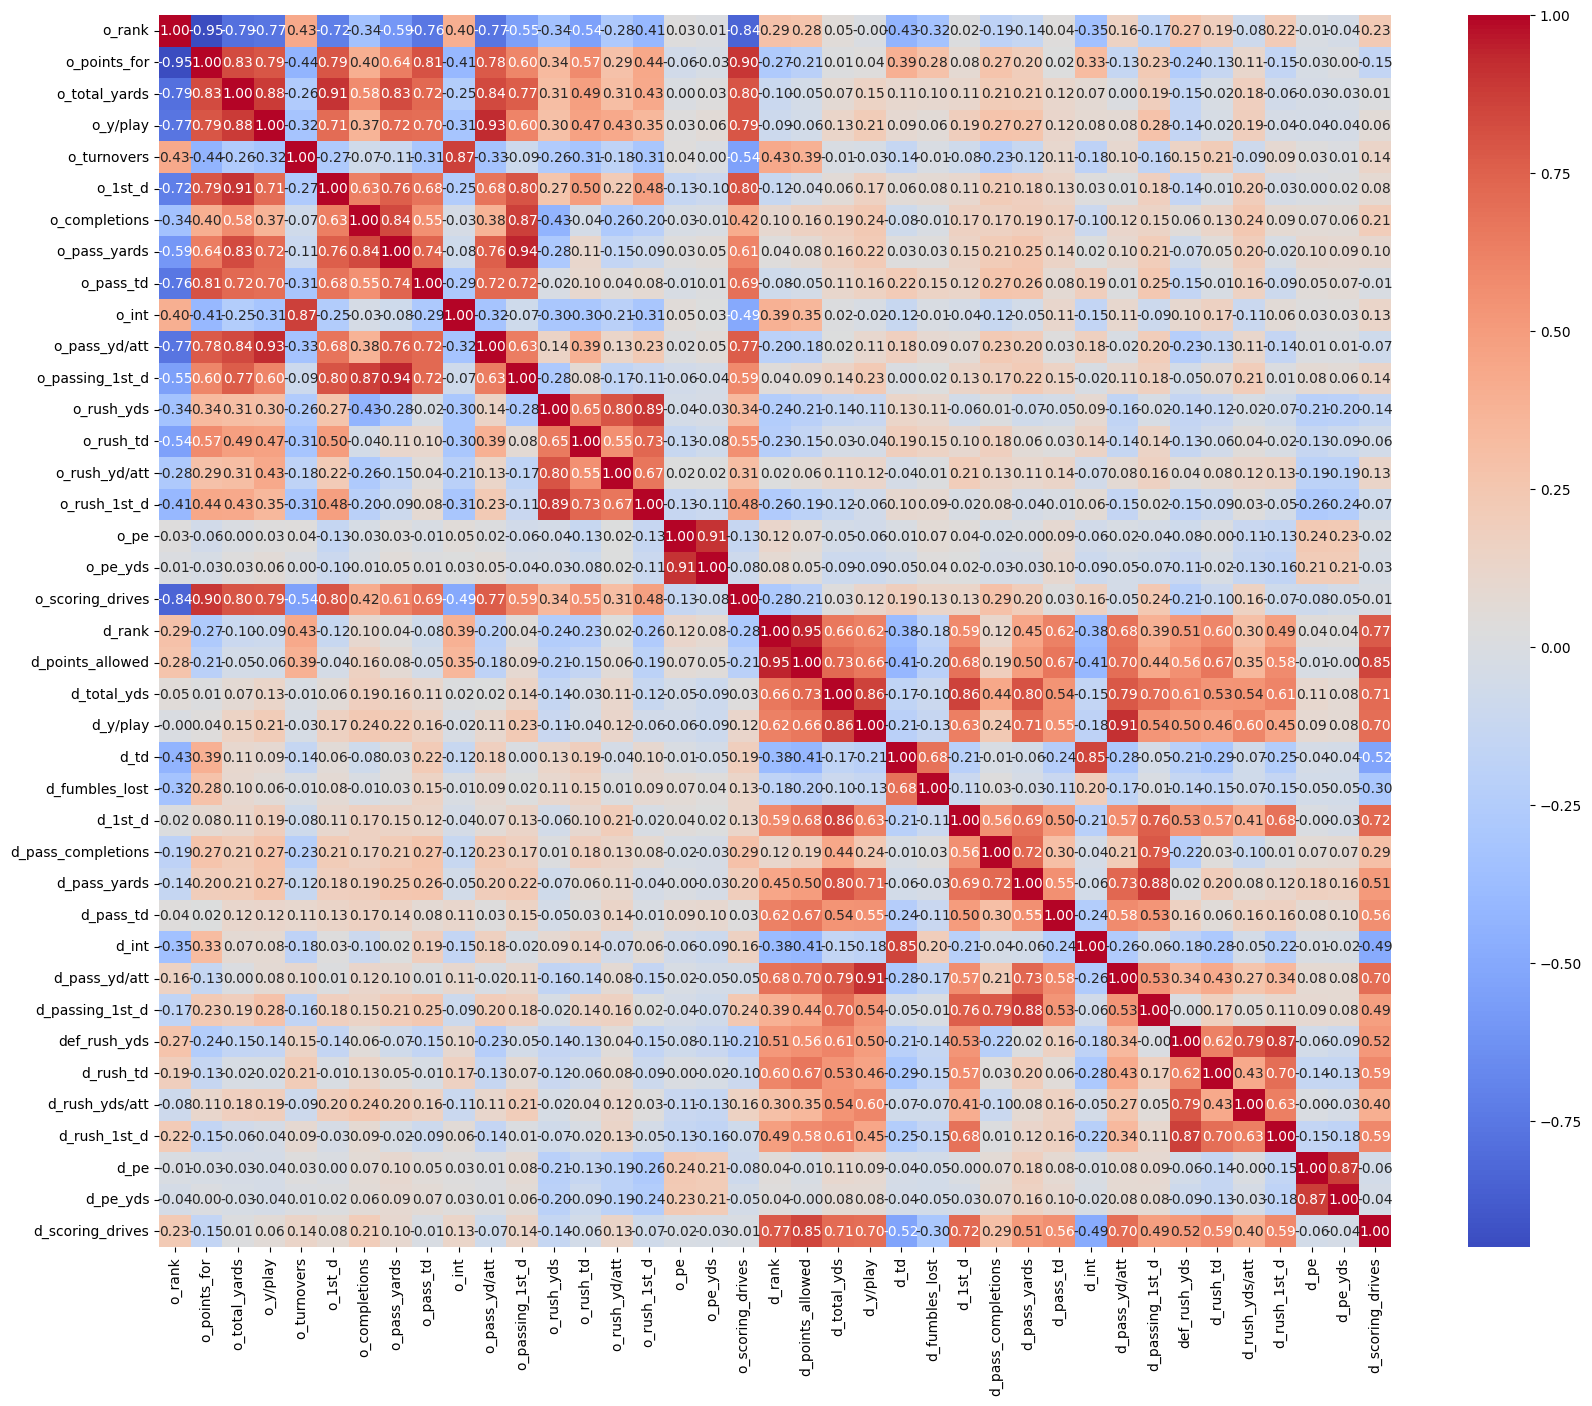

In [34]:
# Checking for multicollinearity

corr_matrix = pd.DataFrame(X).corr()
corr_matrix.columns = train_columns
corr_matrix.index = train_columns

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True, fmt='.2f')
plt.show()

### Decision Tree

In [35]:
# Combine the offense and defense data
combined_df = offense_total.merge(defense_total, on = ['team', 'year'])

In [36]:
# Making year an integer

combined_df['year'] = combined_df['year'].astype(int)

In [37]:
# Adding superbowl winners to combined_df

combined_df = pd.merge(combined_df, superbowl_winners, left_on = ['year','team'], right_on = ['year', 'Winner'], how = 'left')

In [38]:
# Filling in missing values and making data integers

combined_df.superbowl = combined_df.superbowl.fillna(0)
combined_df.superbowl = combined_df.superbowl.astype('int')

In [39]:
# Dropping winner column

combined_df = combined_df.drop(['Winner'], axis = 1)

In [40]:
# Select the features to use for training the model
feature_cols = ['o_rank', 'o_points_for', 'o_total_yards',
       'o_y/play', 'o_turnovers', 'o_1st_d',
       'o_completions', 'o_pass_yards', 'o_pass_td', 'o_int',
       'o_pass_yd/att', 'o_passing_1st_d', 'o_rush_yds',
       'o_rush_td', 'o_rush_yd/att', 'o_rush_1st_d', 'o_pe', 'o_pe_yds', 
       'o_scoring_drives', 'd_rank',
       'd_points_allowed', 'd_total_yds', 
       'd_y/play', 'd_td', 'd_fumbles_lost', 'd_1st_d', 'd_pass_completions',
       'd_pass_yards', 'd_pass_td',
       'd_int', 'd_pass_yd/att', 'd_passing_1st_d', 'def_rush_yds', 'd_rush_td', 'd_rush_yds/att', 'd_rush_1st_d', 'd_pe',
       'd_pe_yds', 'd_scoring_drives']

X = combined_df[feature_cols]
y = combined_df['superbowl']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree model
dt = DecisionTreeClassifier(random_state=42, max_depth=7)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Get the feature importances
importances = dt.feature_importances_

# Print the feature importances
for feature, importance in zip(feature_cols, importances):
    print(f"{feature}: {importance:.3f}")

o_rank: 0.000
o_points_for: 0.000
o_total_yards: 0.000
o_y/play: 0.000
o_turnovers: 0.000
o_1st_d: 0.000
o_completions: 0.000
o_pass_yards: 0.000
o_pass_td: 0.000
o_int: 0.140
o_pass_yd/att: 0.052
o_passing_1st_d: 0.000
o_rush_yds: 0.128
o_rush_td: 0.000
o_rush_yd/att: 0.000
o_rush_1st_d: 0.000
o_pe: 0.000
o_pe_yds: 0.098
o_scoring_drives: 0.000
d_rank: 0.098
d_points_allowed: 0.000
d_total_yds: 0.000
d_y/play: 0.141
d_td: 0.000
d_fumbles_lost: 0.000
d_1st_d: 0.000
d_pass_completions: 0.000
d_pass_yards: 0.000
d_pass_td: 0.000
d_int: 0.000
d_pass_yd/att: 0.000
d_passing_1st_d: 0.000
def_rush_yds: 0.048
d_rush_td: 0.044
d_rush_yds/att: 0.000
d_rush_1st_d: 0.000
d_pe: 0.000
d_pe_yds: 0.251
d_scoring_drives: 0.000


In [41]:
y_pred2 = dt.predict(X_test)

In [42]:
# Compute accuracy on test set
dt_test_accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", dt_test_accuracy)

Accuracy: 0.9482758620689655


In [43]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [44]:
test_set.columns

Index(['o_rank', 'team', 'o_games_played', 'o_points_for', 'o_total_yards',
       'o_plays', 'o_y/play', 'o_turnovers', 'o_fumbles_lost', 'o_1st_d',
       'o_completions', 'o_pass_attempts', 'o_pass_yards', 'o_pass_td',
       'o_int', 'o_pass_yd/att', 'o_passing_1st_d', 'o_rush_att', 'o_rush_yds',
       'o_rush_td', 'o_rush_yd/att', 'o_rush_1st_d', 'o_pe', 'o_pe_yds',
       'o_pe_1st_d', 'o_scoring_drives', 'o_to_%', 'o_expected_points', 'year',
       'd_rank', 'd_games_played', 'd_points_allowed', 'd_total_yds',
       'd_plays', 'd_y/play', 'd_td', 'd_fumbles_lost', 'd_1st_d',
       'd_pass_completions', 'd_pass_attempts', 'd_pass_yards', 'd_pass_td',
       'd_int', 'd_pass_yd/att', 'd_passing_1st_d', 'd_rush_att',
       'def_rush_yds', 'd_rush_td', 'd_rush_yds/att', 'd_rush_1st_d', 'd_pe',
       'd_pe_yds', 'd_pe_1st_d', 'd_scoring_drives', 'd_td_%',
       'd_expected_points'],
      dtype='object')

In [45]:
X_test.columns

Index(['o_rank', 'o_points_for', 'o_total_yards', 'o_y/play', 'o_turnovers',
       'o_1st_d', 'o_completions', 'o_pass_yards', 'o_pass_td', 'o_int',
       'o_pass_yd/att', 'o_passing_1st_d', 'o_rush_yds', 'o_rush_td',
       'o_rush_yd/att', 'o_rush_1st_d', 'o_pe', 'o_pe_yds', 'o_scoring_drives',
       'd_rank', 'd_points_allowed', 'd_total_yds', 'd_y/play', 'd_td',
       'd_fumbles_lost', 'd_1st_d', 'd_pass_completions', 'd_pass_yards',
       'd_pass_td', 'd_int', 'd_pass_yd/att', 'd_passing_1st_d',
       'def_rush_yds', 'd_rush_td', 'd_rush_yds/att', 'd_rush_1st_d', 'd_pe',
       'd_pe_yds', 'd_scoring_drives'],
      dtype='object')

In [46]:
test_set2 = test_set[X_test.columns]
test_set2.shape

(32, 39)

In [47]:
X_test.shape

(116, 39)

In [48]:
y_pred2 = dt.predict_proba(test_set2)

In [49]:
for team, (lose, win) in zip(combined_df.team, y_pred2):
  if win==1:
    print(team)

New Orleans Saints


### ADABOOST

In [50]:
abc =AdaBoostClassifier(n_estimators=20, learning_rate=1)

model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_binary = model.predict(X_train)
y_pred = model.predict_proba(test_set2)
y_pred

array([[9.54009056e-01, 4.59909445e-02],
       [9.91050571e-01, 8.94942893e-03],
       [9.44013125e-01, 5.59868752e-02],
       [8.75845308e-01, 1.24154692e-01],
       [9.99904841e-01, 9.51588235e-05],
       [9.90255834e-01, 9.74416595e-03],
       [9.37068927e-01, 6.29310726e-02],
       [9.12668415e-01, 8.73315855e-02],
       [9.73566558e-01, 2.64334415e-02],
       [9.02651764e-01, 9.73482359e-02],
       [9.23116778e-01, 7.68832217e-02],
       [9.94174058e-01, 5.82594197e-03],
       [9.40555087e-01, 5.94449130e-02],
       [9.96658585e-01, 3.34141534e-03],
       [9.99856281e-01, 1.43719482e-04],
       [9.99522882e-01, 4.77117747e-04],
       [7.29954480e-01, 2.70045520e-01],
       [9.99512540e-01, 4.87459703e-04],
       [8.99463201e-01, 1.00536799e-01],
       [9.99108651e-01, 8.91349106e-04],
       [9.99139942e-01, 8.60057784e-04],
       [9.99795903e-01, 2.04096648e-04],
       [9.99987776e-01, 1.22236561e-05],
       [9.98085984e-01, 1.91401557e-03],
       [8.828253

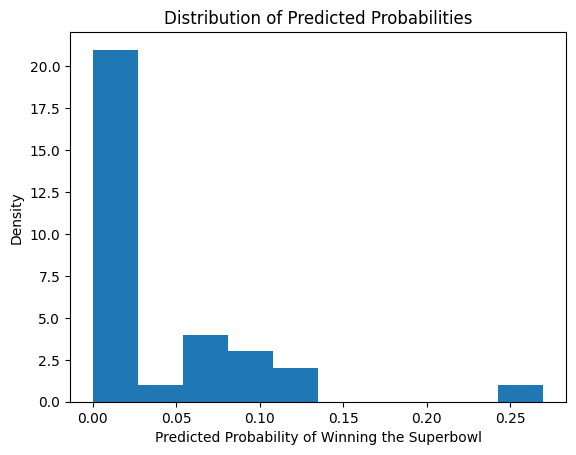

In [51]:
# Plot the predicted probabilities for class 1
plt.hist(y_pred[:,1])
plt.xlabel('Predicted Probability of Winning the Superbowl')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.show()

In [52]:
print(len(o_rank))

32


In [53]:
df3 = pd.DataFrame({'Team':teams, 'Prediction':y_pred[:,1], 'o_rank':o_rank, 'd_rank':d_rank }) 
df3['Prediction_Rank'] = df3['Prediction'].rank(ascending = False)
df3 = df3.sort_values(by = ['Prediction'], ascending = False)
df3

,Team,Prediction,o_rank,d_rank,Prediction_Rank
16,New England Patriots,0.270046,17.0,11.0,1.0
3,Buffalo Bills,0.124155,4.0,2.0,2.0
24,Tampa Bay Buccaneers,0.117175,25.0,13.0,3.0
18,Baltimore Ravens,0.100537,19.0,3.0,4.0
9,Jacksonville Jaguars,0.097348,10.0,12.0,5.0
7,Cincinnati Bengals,0.087332,8.0,5.0,6.0
10,Miami Dolphins,0.076883,11.0,24.0,7.0
6,Minnesota Vikings,0.062931,7.0,28.0,8.0
12,Los Angeles Chargers,0.059445,13.0,21.0,9.0
2,Dallas Cowboys,0.055987,3.0,6.0,10.0
